# Comparing plasticity rules

## For every model, meta-learn on 8-dimensional ReLU dataset, then transfer rules to a NEW instance, and train / test that on the same dataset type but with fixed rules.

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

## First, test original RNN as a sanity check.

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
scheme = UpdateScheme(cross_entropy_loss=True,
                      mse_loss=False,
                      update_misclassified_only=False,
                      update_all_edges=True)

# Feed-forward brain config.
n_up = 8  # Input layer size for meta-learning.
n_down = 8  # Input layer size for desired task training.
m = 2  # Output layer size.
l = 2  # Number of hidden layers.
w = 32  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 16  # Number of nodes firing per layer.

# Training config.
num_runs = 10
num_rule_epochs = 50
num_epochs_upstream = 1
num_epochs_downstream = 1
dataset = 'relu'

In [3]:
# Instantiate brain factories.
brain_rnn_up_fact = lambda: LocalNet(n_up, m, 64, p, 32, 3, options=opts_up, update_scheme=scheme)
brain_rnn_down_fact = lambda: LocalNet(n_down, m, 64, p, 32, 3, options=opts_down, update_scheme=scheme)

In [4]:
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_up_down(
    brain_rnn_up_fact, brain_rnn_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

..\DataGenerator.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out2 = F.softmax(torch.matmul(out1, w1))
  0%|                                  | 0/50 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====

Run 1 / 10...
Count of 0: 3655  Count of 1: 2345
Meta-learning...


100%|█████████████████████████| 50/50 [01:22<00:00,  1.64s/it]
..\LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()
  3%|▋                     | 49/1500 [00:00<00:02, 489.55it/s]

Last loss: 0.4912
Last train accuracy: 0.8560
Last test accuracy: 0.8396
Count of 0: 2733  Count of 1: 3267
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.6940
INITIAL test accuracy: 0.6987
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6253
Last train accuracy: 0.7087
Last test accuracy: 0.6973


Run 2 / 10...
Count of 0: 2536  Count of 1: 3464
Meta-learning...


  0%|                                | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4783
Last train accuracy: 0.7973
Last test accuracy: 0.8011
Count of 0: 5550  Count of 1: 450
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5227
INITIAL test accuracy: 0.5576
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.3833
Last train accuracy: 0.9173
Last test accuracy: 0.9276


Run 3 / 10...
Count of 0: 5246  Count of 1: 754
Meta-learning...


  0%|                                | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3960
Last train accuracy: 0.8607
Last test accuracy: 0.8789
Count of 0: 3546  Count of 1: 2454
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5707
INITIAL test accuracy: 0.5978
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7513
Last train accuracy: 0.5707
Last test accuracy: 0.5978


Run 4 / 10...
Count of 0: 1045  Count of 1: 4955
Meta-learning...


  3%|▌                     | 39/1500 [00:00<00:03, 383.87it/s]

Last loss: 0.4047
Last train accuracy: 0.9300
Last test accuracy: 0.9218
Count of 0: 5057  Count of 1: 943
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.8313
INITIAL test accuracy: 0.8467
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4633
Last train accuracy: 0.8313
Last test accuracy: 0.8467


Run 5 / 10...
Count of 0: 2096  Count of 1: 3904
Meta-learning...


  3%|▌                     | 40/1500 [00:00<00:03, 391.80it/s]

Last loss: 0.4818
Last train accuracy: 0.8500
Last test accuracy: 0.8482
Count of 0: 415  Count of 1: 5585
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5127
INITIAL test accuracy: 0.5273
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.3953
Last train accuracy: 0.9240
Last test accuracy: 0.9331


Run 6 / 10...
Count of 0: 2484  Count of 1: 3516
Meta-learning...


  3%|▋                     | 43/1500 [00:00<00:03, 425.35it/s]

Last loss: 0.4381
Last train accuracy: 0.8867
Last test accuracy: 0.8816
Count of 0: 4920  Count of 1: 1080
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.8280
INITIAL test accuracy: 0.8173
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4733
Last train accuracy: 0.8280
Last test accuracy: 0.8173


Run 7 / 10...
Count of 0: 1763  Count of 1: 4237
Meta-learning...


  0%|                                | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4516
Last train accuracy: 0.9107
Last test accuracy: 0.8911
Count of 0: 1714  Count of 1: 4286
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.7147
INITIAL test accuracy: 0.7124
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5738
Last train accuracy: 0.7233
Last test accuracy: 0.7244


Run 8 / 10...
Count of 0: 3835  Count of 1: 2165
Meta-learning...


  4%|▊                     | 55/1500 [00:00<00:02, 544.06it/s]

Last loss: 0.4725
Last train accuracy: 0.8753
Last test accuracy: 0.8867
Count of 0: 2041  Count of 1: 3959
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.6153
INITIAL test accuracy: 0.6136
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6513
Last train accuracy: 0.6413
Last test accuracy: 0.6516


Run 9 / 10...
Count of 0: 32  Count of 1: 5968
Meta-learning...


  3%|▌                     | 38/1500 [00:00<00:03, 379.66it/s]

Last loss: 0.3171
Last train accuracy: 0.9967
Last test accuracy: 0.9940
Count of 0: 5776  Count of 1: 224
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.0493
INITIAL test accuracy: 0.0458
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.3513
Last train accuracy: 0.9607
Last test accuracy: 0.9633


Run 10 / 10...
Count of 0: 1392  Count of 1: 4608
Meta-learning...


  0%|                                | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4445
Last train accuracy: 0.8840
Last test accuracy: 0.8702
Count of 0: 3428  Count of 1: 2572
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5660
INITIAL test accuracy: 0.5731
Epoch 1 / 1 ...


100%|████████████████████| 1500/1500 [00:03<00:00, 439.78it/s]


Last loss: 0.7188
Last train accuracy: 0.5660
Last test accuracy: 0.5731



Saving figure to: figs/default


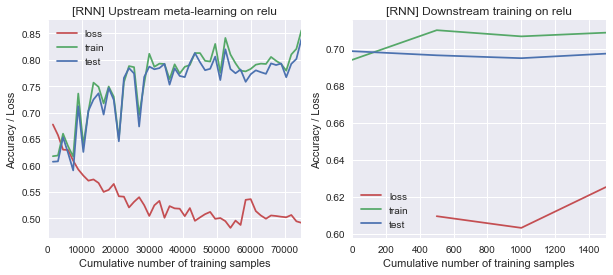

Mean essential stats across all runs:
Last upstream loss: 0.4912
Last upstream train accuracy: 0.8560
Last upstream test accuracy: 0.8396
Last downstream loss: 0.6253
Last downstream train accuracy: 0.7087
Last downstream test accuracy: 0.6973

Saving figure to: figs/default


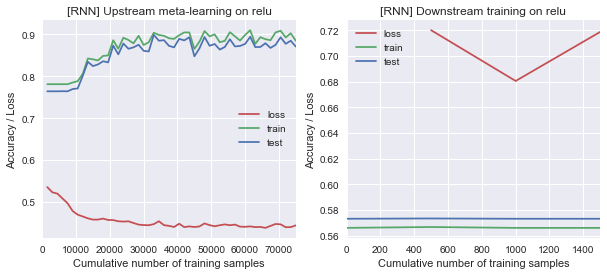

Mean essential stats across all runs:
Last upstream loss: 0.4445
Last upstream train accuracy: 0.8840
Last upstream test accuracy: 0.8702
Last downstream loss: 0.7188
Last downstream train accuracy: 0.5660
Last downstream test accuracy: 0.5731



In [5]:
# Plot FIRST and lAST run stats only.
plot_curves(stats_rnn_up[0], stats_rnn_down[0],
            '[RNN] Upstream meta-learning on ' + dataset,
            '[RNN] Downstream training on ' + dataset)
plot_curves(stats_rnn_up[-1], stats_rnn_down[-1],
            '[RNN] Upstream meta-learning on ' + dataset,
            '[RNN] Downstream training on ' + dataset)

Saving figure to: figs/comparing_transfer_rnn_relu


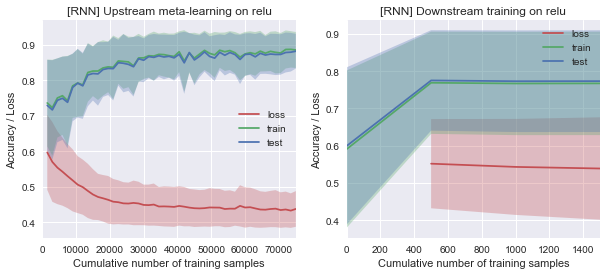

Mean essential stats across all runs:
Last upstream loss: 0.4376
Last upstream train accuracy: 0.8847
Last upstream test accuracy: 0.8813
Last downstream loss: 0.5387
Last downstream train accuracy: 0.7671
Last downstream test accuracy: 0.7732



In [6]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on ' + dataset,
            '[RNN] Downstream training on ' + dataset,
            'figs/comparing_transfer_rnn_' + dataset)

## Evaluate all table-based feed-forward networks.

In [7]:
# Instantiate brain factories.
brain_prepost_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme)
brain_prepost_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme)
brain_prepostcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme)
brain_prepostcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_down, update_scheme=scheme)
brain_prepostpercent_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_up, update_scheme=scheme)
brain_prepostpercent_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_down, update_scheme=scheme)
brain_postcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_up, update_scheme=scheme)
brain_postcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_down, update_scheme=scheme)

In [8]:
# Evaluate models.
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_up_down(
    brain_prepost_up_fact, brain_prepost_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Incoming Count ====')
stats_prepostcount_up, stats_prepostcount_down = evaluate_up_down(
    brain_prepostcount_up_fact, brain_prepostcount_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Binned Incoming Fraction ====')
stats_prepostpercent_up, stats_prepostpercent_down = evaluate_up_down(
    brain_prepostpercent_up_fact, brain_prepostpercent_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Post and Incoming Count ====')
stats_postcount_up, stats_postcount_down = evaluate_up_down(
    brain_postcount_up_fact, brain_postcount_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

..\DataGenerator.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out2 = F.softmax(torch.matmul(out1, w1))
  0%|                                  | 0/50 [00:00<?, ?it/s]

==== Interpretation: Pre and Post ====

Run 1 / 10...
Count of 0: 6000  Count of 1: 0
Meta-learning...


  5%|█▏                    | 80/1500 [00:00<00:01, 799.27it/s]

Last loss: 0.6931
Last train accuracy: 1.0000
Last test accuracy: 1.0000
Count of 0: 2619  Count of 1: 3381
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4640
INITIAL test accuracy: 0.4273
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4640
Last test accuracy: 0.4273


Run 2 / 10...
Count of 0: 5016  Count of 1: 984
Meta-learning...


  5%|█                     | 70/1500 [00:00<00:02, 699.37it/s]

Last loss: 0.4255
Last train accuracy: 0.8400
Last test accuracy: 0.8347
Count of 0: 2944  Count of 1: 3056
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4880
INITIAL test accuracy: 0.4916
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.8333
Last train accuracy: 0.5120
Last test accuracy: 0.5084


Run 3 / 10...
Count of 0: 3141  Count of 1: 2859
Meta-learning...


  4%|▉                     | 64/1500 [00:00<00:02, 639.42it/s]

Last loss: 0.6931
Last train accuracy: 0.5387
Last test accuracy: 0.5184
Count of 0: 1554  Count of 1: 4446
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.2560
INITIAL test accuracy: 0.2600
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.2560
Last test accuracy: 0.2600


Run 4 / 10...
Count of 0: 2313  Count of 1: 3687
Meta-learning...


  5%|█                     | 76/1500 [00:00<00:01, 759.31it/s]

Last loss: 0.3903
Last train accuracy: 0.9253
Last test accuracy: 0.9144
Count of 0: 2590  Count of 1: 3410
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4007
INITIAL test accuracy: 0.4420
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5536
Last train accuracy: 0.7873
Last test accuracy: 0.7669


Run 5 / 10...
Count of 0: 2335  Count of 1: 3665
Meta-learning...


  5%|█                     | 76/1500 [00:00<00:01, 759.31it/s]

Last loss: 0.3900
Last train accuracy: 0.9373
Last test accuracy: 0.9176
Count of 0: 137  Count of 1: 5863
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.0247
INITIAL test accuracy: 0.0222
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.3413
Last train accuracy: 0.9733
Last test accuracy: 0.9749


Run 6 / 10...
Count of 0: 3916  Count of 1: 2084
Meta-learning...


  5%|█                     | 76/1500 [00:00<00:01, 759.31it/s]

Last loss: 0.4003
Last train accuracy: 0.9267
Last test accuracy: 0.9076
Count of 0: 3436  Count of 1: 2564
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4367
INITIAL test accuracy: 0.4242
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5368
Last train accuracy: 0.7580
Last test accuracy: 0.7818


Run 7 / 10...
Count of 0: 5729  Count of 1: 271
Meta-learning...


  5%|█                     | 74/1500 [00:00<00:01, 739.33it/s]

Last loss: 0.3457
Last train accuracy: 0.9540
Last test accuracy: 0.9551
Count of 0: 2411  Count of 1: 3589
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.3873
INITIAL test accuracy: 0.4067
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7173
Last train accuracy: 0.6127
Last test accuracy: 0.5933


Run 8 / 10...
Count of 0: 3521  Count of 1: 2479
Meta-learning...


  5%|█                     | 71/1500 [00:00<00:02, 702.33it/s]

Last loss: 0.3899
Last train accuracy: 0.8947
Last test accuracy: 0.8951
Count of 0: 838  Count of 1: 5162
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.1467
INITIAL test accuracy: 0.1373
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4433
Last train accuracy: 0.8540
Last test accuracy: 0.8620


Run 9 / 10...
Count of 0: 2946  Count of 1: 3054
Meta-learning...


  5%|█                     | 70/1500 [00:00<00:02, 699.36it/s]

Last loss: 0.6931
Last train accuracy: 0.4967
Last test accuracy: 0.4891
Count of 0: 819  Count of 1: 5181
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.1373
INITIAL test accuracy: 0.1362
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.1373
Last test accuracy: 0.1362


Run 10 / 10...
Count of 0: 2419  Count of 1: 3581
Meta-learning...


  5%|█▏                    | 77/1500 [00:00<00:01, 769.30it/s]

Last loss: 0.3733
Last train accuracy: 0.9427
Last test accuracy: 0.9256
Count of 0: 1649  Count of 1: 4351
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.2700
INITIAL test accuracy: 0.2764
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5953
Last train accuracy: 0.7307
Last test accuracy: 0.7242

==== Interpretation: Pre and Post and Incoming Count ====

Run 1 / 10...
Count of 0: 3069  Count of 1: 2931
Meta-learning...


  5%|█                     | 74/1500 [00:00<00:01, 739.33it/s]

Last loss: 0.6931
Last train accuracy: 0.4960
Last test accuracy: 0.5167
Count of 0: 3602  Count of 1: 2398
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.3993
INITIAL test accuracy: 0.3998
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.6007
Last test accuracy: 0.6002


Run 2 / 10...
Count of 0: 3783  Count of 1: 2217
Meta-learning...


  5%|█                     | 70/1500 [00:00<00:02, 692.44it/s]

Last loss: 0.5460
Last train accuracy: 0.6467
Last test accuracy: 0.6251
Count of 0: 5428  Count of 1: 572
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.8987
INITIAL test accuracy: 0.9067
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4433
Last train accuracy: 0.8987
Last test accuracy: 0.9067


Run 3 / 10...
Count of 0: 2284  Count of 1: 3716
Meta-learning...


  4%|▉                     | 66/1500 [00:00<00:02, 659.40it/s]

Last loss: 0.4017
Last train accuracy: 0.9360
Last test accuracy: 0.9369
Count of 0: 2458  Count of 1: 3542
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5853
INITIAL test accuracy: 0.5920
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6851
Last train accuracy: 0.6800
Last test accuracy: 0.6896


Run 4 / 10...
Count of 0: 1828  Count of 1: 4172
Meta-learning...


  5%|█▏                    | 77/1500 [00:00<00:01, 765.45it/s]

Last loss: 0.3936
Last train accuracy: 0.9267
Last test accuracy: 0.9038
Count of 0: 5228  Count of 1: 772
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.1227
INITIAL test accuracy: 0.1307
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4293
Last train accuracy: 0.8773
Last test accuracy: 0.8693


Run 5 / 10...
Count of 0: 5710  Count of 1: 290
Meta-learning...


  5%|█                     | 72/1500 [00:00<00:01, 719.35it/s]

Last loss: 0.3535
Last train accuracy: 0.9540
Last test accuracy: 0.9509
Count of 0: 1719  Count of 1: 4281
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.7027
INITIAL test accuracy: 0.7171
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6193
Last train accuracy: 0.7027
Last test accuracy: 0.7171


Run 6 / 10...
Count of 0: 5353  Count of 1: 647
Meta-learning...


  4%|▉                     | 62/1500 [00:00<00:02, 610.21it/s]

Last loss: 0.3987
Last train accuracy: 0.8887
Last test accuracy: 0.8933
Count of 0: 1690  Count of 1: 4310
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.2847
INITIAL test accuracy: 0.2807
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6233
Last train accuracy: 0.7153
Last test accuracy: 0.7193


Run 7 / 10...
Count of 0: 213  Count of 1: 5787
Meta-learning...


  5%|█                     | 73/1500 [00:00<00:01, 722.11it/s]

Last loss: 0.3442
Last train accuracy: 0.9660
Last test accuracy: 0.9642
Count of 0: 4610  Count of 1: 1390
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.7500
INITIAL test accuracy: 0.7744
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5693
Last train accuracy: 0.7500
Last test accuracy: 0.7744


Run 8 / 10...
Count of 0: 4839  Count of 1: 1161
Meta-learning...


  4%|▉                     | 65/1500 [00:00<00:02, 642.98it/s]

Last loss: 0.4309
Last train accuracy: 0.8113
Last test accuracy: 0.8049
Count of 0: 1702  Count of 1: 4298
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.2713
INITIAL test accuracy: 0.2878
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5693
Last train accuracy: 0.7287
Last test accuracy: 0.7122


Run 9 / 10...
Count of 0: 3079  Count of 1: 2921
Meta-learning...


  4%|▉                     | 62/1500 [00:00<00:02, 619.43it/s]

Last loss: 0.6931
Last train accuracy: 0.4947
Last test accuracy: 0.5193
Count of 0: 3502  Count of 1: 2498
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5853
INITIAL test accuracy: 0.5831
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5853
Last test accuracy: 0.5831


Run 10 / 10...
Count of 0: 3858  Count of 1: 2142
Meta-learning...


  5%|█                     | 71/1500 [00:00<00:02, 709.36it/s]

Last loss: 0.4213
Last train accuracy: 0.8947
Last test accuracy: 0.8742
Count of 0: 1211  Count of 1: 4789
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.7927
INITIAL test accuracy: 0.8000
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5113
Last train accuracy: 0.7927
Last test accuracy: 0.8000

==== Interpretation: Pre and Post and Binned Incoming Fraction ====

Run 1 / 10...
Count of 0: 2628  Count of 1: 3372
Meta-learning...


  5%|█                     | 71/1500 [00:00<00:02, 702.33it/s]

Last loss: 0.3769
Last train accuracy: 0.9533
Last test accuracy: 0.9373
Count of 0: 2511  Count of 1: 3489
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5807
INITIAL test accuracy: 0.5818
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5675
Last train accuracy: 0.7513
Last test accuracy: 0.7631


Run 2 / 10...
Count of 0: 5000  Count of 1: 1000
Meta-learning...


  5%|█                     | 72/1500 [00:00<00:01, 719.35it/s]

Last loss: 0.4255
Last train accuracy: 0.8247
Last test accuracy: 0.8362
Count of 0: 2165  Count of 1: 3835
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.3593
INITIAL test accuracy: 0.3613
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6593
Last train accuracy: 0.6407
Last test accuracy: 0.6387


Run 3 / 10...
Count of 0: 4473  Count of 1: 1527
Meta-learning...


  4%|▉                     | 63/1500 [00:00<00:02, 629.43it/s]

Last loss: 0.4767
Last train accuracy: 0.7460
Last test accuracy: 0.7453
Count of 0: 3460  Count of 1: 2540
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5613
INITIAL test accuracy: 0.5818
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7493
Last train accuracy: 0.5613
Last test accuracy: 0.5818


Run 4 / 10...
Count of 0: 1513  Count of 1: 4487
Meta-learning...


  4%|▊                     | 59/1500 [00:00<00:02, 589.46it/s]

Last loss: 0.4570
Last train accuracy: 0.7733
Last test accuracy: 0.7842
Count of 0: 956  Count of 1: 5044
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.1767
INITIAL test accuracy: 0.1536
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4933
Last train accuracy: 0.8233
Last test accuracy: 0.8464


Run 5 / 10...
Count of 0: 1327  Count of 1: 4673
Meta-learning...


  4%|▉                     | 64/1500 [00:00<00:02, 633.09it/s]

Last loss: 0.4420
Last train accuracy: 0.8320
Last test accuracy: 0.8038
Count of 0: 4332  Count of 1: 1668
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.3007
INITIAL test accuracy: 0.2704
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6233
Last train accuracy: 0.6993
Last test accuracy: 0.7296


Run 6 / 10...
Count of 0: 1119  Count of 1: 4881
Meta-learning...


  5%|█                     | 70/1500 [00:00<00:02, 692.44it/s]

Last loss: 0.4428
Last train accuracy: 0.8180
Last test accuracy: 0.8238
Count of 0: 3372  Count of 1: 2628
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5500
INITIAL test accuracy: 0.5660
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7373
Last train accuracy: 0.5500
Last test accuracy: 0.5660


Run 7 / 10...
Count of 0: 2776  Count of 1: 3224
Meta-learning...


  5%|█                     | 70/1500 [00:00<00:02, 699.37it/s]

Last loss: 0.6931
Last train accuracy: 0.5287
Last test accuracy: 0.5582
Count of 0: 1916  Count of 1: 4084
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.3000
INITIAL test accuracy: 0.3258
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.7000
Last test accuracy: 0.6742


Run 8 / 10...
Count of 0: 2158  Count of 1: 3842
Meta-learning...


  4%|▉                     | 64/1500 [00:00<00:02, 639.42it/s]

Last loss: 0.5210
Last train accuracy: 0.6487
Last test accuracy: 0.6431
Count of 0: 1956  Count of 1: 4044
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.3240
INITIAL test accuracy: 0.3267
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6433
Last train accuracy: 0.6760
Last test accuracy: 0.6733


Run 9 / 10...
Count of 0: 2874  Count of 1: 3126
Meta-learning...


  4%|▉                     | 60/1500 [00:00<00:02, 599.45it/s]

Last loss: 0.6931
Last train accuracy: 0.5920
Last test accuracy: 0.6060
Count of 0: 85  Count of 1: 5915
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.0120
INITIAL test accuracy: 0.0149
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.9873
Last test accuracy: 0.9838


Run 10 / 10...
Count of 0: 3713  Count of 1: 2287
Meta-learning...


  5%|█                     | 72/1500 [00:00<00:01, 719.35it/s]

Last loss: 0.3995
Last train accuracy: 0.9407
Last test accuracy: 0.9156
Count of 0: 5007  Count of 1: 993
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.1540
INITIAL test accuracy: 0.1693
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5724
Last train accuracy: 0.7867
Last test accuracy: 0.7611

==== Interpretation: Post and Incoming Count ====

Run 1 / 10...
Count of 0: 166  Count of 1: 5834
Meta-learning...


  5%|█                     | 72/1500 [00:00<00:01, 719.34it/s]

Last loss: 0.3392
Last train accuracy: 0.9760
Last test accuracy: 0.9711
Count of 0: 5032  Count of 1: 968
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.8347
INITIAL test accuracy: 0.8400
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4713
Last train accuracy: 0.8347
Last test accuracy: 0.8400


Run 2 / 10...
Count of 0: 3946  Count of 1: 2054
Meta-learning...


  4%|▉                     | 66/1500 [00:00<00:02, 659.40it/s]

Last loss: 0.4917
Last train accuracy: 0.6667
Last test accuracy: 0.6547
Count of 0: 4992  Count of 1: 1008
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.1653
INITIAL test accuracy: 0.1689
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4813
Last train accuracy: 0.8347
Last test accuracy: 0.8311


Run 3 / 10...
Count of 0: 3806  Count of 1: 2194
Meta-learning...


  5%|█                     | 74/1500 [00:00<00:01, 732.01it/s]

Last loss: 0.5375
Last train accuracy: 0.6160
Last test accuracy: 0.6404
Count of 0: 4152  Count of 1: 1848
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.3113
INITIAL test accuracy: 0.3069
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6493
Last train accuracy: 0.6887
Last test accuracy: 0.6931


Run 4 / 10...
Count of 0: 5800  Count of 1: 200
Meta-learning...


  5%|█                     | 73/1500 [00:00<00:01, 722.12it/s]

Last loss: 0.3363
Last train accuracy: 0.9733
Last test accuracy: 0.9644
Count of 0: 2725  Count of 1: 3275
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4547
INITIAL test accuracy: 0.4540
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7493
Last train accuracy: 0.5453
Last test accuracy: 0.5460


Run 5 / 10...
Count of 0: 5059  Count of 1: 941
Meta-learning...


  5%|█                     | 73/1500 [00:00<00:01, 729.34it/s]

Last loss: 0.4145
Last train accuracy: 0.8427
Last test accuracy: 0.8433
Count of 0: 801  Count of 1: 5199
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.8800
INITIAL test accuracy: 0.8620
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4493
Last train accuracy: 0.8800
Last test accuracy: 0.8620


Run 6 / 10...
Count of 0: 373  Count of 1: 5627
Meta-learning...


  5%|█                     | 75/1500 [00:00<00:01, 749.32it/s]

Last loss: 0.3700
Last train accuracy: 0.9333
Last test accuracy: 0.9400
Count of 0: 2462  Count of 1: 3538
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.3907
INITIAL test accuracy: 0.4169
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7213
Last train accuracy: 0.6093
Last test accuracy: 0.5831


Run 7 / 10...
Count of 0: 3258  Count of 1: 2742
Meta-learning...


  4%|▉                     | 67/1500 [00:00<00:02, 669.39it/s]

Last loss: 0.6226
Last train accuracy: 0.5360
Last test accuracy: 0.5453
Count of 0: 4427  Count of 1: 1573
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.2740
INITIAL test accuracy: 0.2582
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5733
Last train accuracy: 0.7260
Last test accuracy: 0.7418


Run 8 / 10...
Count of 0: 1119  Count of 1: 4881
Meta-learning...


  4%|▉                     | 66/1500 [00:00<00:02, 652.87it/s]

Last loss: 0.4284
Last train accuracy: 0.8240
Last test accuracy: 0.8242
Count of 0: 4097  Count of 1: 1903
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.6853
INITIAL test accuracy: 0.6820
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6053
Last train accuracy: 0.6853
Last test accuracy: 0.6820


Run 9 / 10...
Count of 0: 451  Count of 1: 5549
Meta-learning...


  5%|█                     | 70/1500 [00:00<00:02, 699.36it/s]

Last loss: 0.3662
Last train accuracy: 0.9340
Last test accuracy: 0.9242
Count of 0: 4531  Count of 1: 1469
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.7520
INITIAL test accuracy: 0.7562
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5553
Last train accuracy: 0.7520
Last test accuracy: 0.7562


Run 10 / 10...
Count of 0: 4122  Count of 1: 1878
Meta-learning...


  5%|▉                     | 68/1500 [00:00<00:02, 679.38it/s]

Last loss: 0.5019
Last train accuracy: 0.6700
Last test accuracy: 0.6927
Count of 0: 5111  Count of 1: 889
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.8647
INITIAL test accuracy: 0.8476
Epoch 1 / 1 ...


100%|████████████████████| 1500/1500 [00:02<00:00, 745.97it/s]


Last loss: 0.4473
Last train accuracy: 0.8647
Last test accuracy: 0.8476



Saving figure to: figs/comparing_transfer_prepost_relu


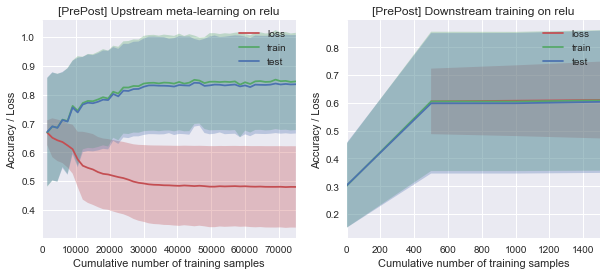

Mean essential stats across all runs:
Last upstream loss: 0.4794
Last upstream train accuracy: 0.8456
Last upstream test accuracy: 0.8358
Last downstream loss: 0.6100
Last downstream train accuracy: 0.6085
Last downstream test accuracy: 0.6035

Saving figure to: figs/comparing_transfer_prepostcount_relu


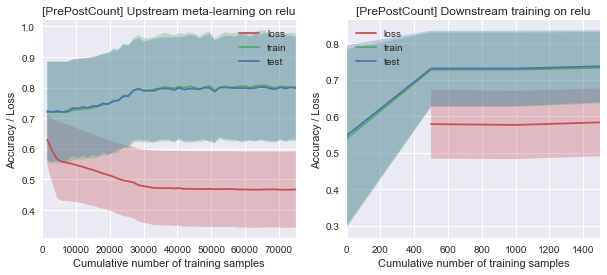

Mean essential stats across all runs:
Last upstream loss: 0.4676
Last upstream train accuracy: 0.8015
Last upstream test accuracy: 0.7989
Last downstream loss: 0.5836
Last downstream train accuracy: 0.7331
Last downstream test accuracy: 0.7372

Saving figure to: figs/comparing_transfer_prepostpercent_relu


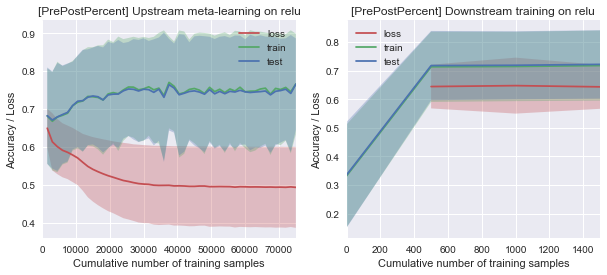

Mean essential stats across all runs:
Last upstream loss: 0.4928
Last upstream train accuracy: 0.7657
Last upstream test accuracy: 0.7654
Last downstream loss: 0.6432
Last downstream train accuracy: 0.7176
Last downstream test accuracy: 0.7218

Saving figure to: figs/comparing_transfer_postcount_relu


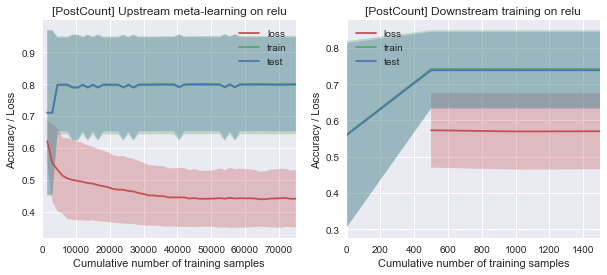

Mean essential stats across all runs:
Last upstream loss: 0.4408
Last upstream train accuracy: 0.7972
Last upstream test accuracy: 0.8000
Last downstream loss: 0.5703
Last downstream train accuracy: 0.7421
Last downstream test accuracy: 0.7383



In [9]:
# Plot aggregated stats.
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on ' + dataset,
            '[PrePost] Downstream training on ' + dataset,
            'figs/comparing_transfer_prepost_' + dataset)
agg_stats_prepostcount_up = convert_multi_stats_uncertainty(stats_prepostcount_up)
agg_stats_prepostcount_down = convert_multi_stats_uncertainty(stats_prepostcount_down)
plot_curves(agg_stats_prepostcount_up, agg_stats_prepostcount_down,
            '[PrePostCount] Upstream meta-learning on ' + dataset,
            '[PrePostCount] Downstream training on ' + dataset,
            'figs/comparing_transfer_prepostcount_' + dataset)
agg_stats_prepostpercent_up = convert_multi_stats_uncertainty(stats_prepostpercent_up)
agg_stats_prepostpercent_down = convert_multi_stats_uncertainty(stats_prepostpercent_down)
plot_curves(agg_stats_prepostpercent_up, agg_stats_prepostpercent_down,
            '[PrePostPercent] Upstream meta-learning on ' + dataset,
            '[PrePostPercent] Downstream training on ' + dataset,
            'figs/comparing_transfer_prepostpercent_' + dataset)
agg_stats_postcount_up = convert_multi_stats_uncertainty(stats_postcount_up)
agg_stats_postcount_down = convert_multi_stats_uncertainty(stats_postcount_down)
plot_curves(agg_stats_postcount_up, agg_stats_postcount_down,
            '[PostCount] Upstream meta-learning on ' + dataset,
            '[PostCount] Downstream training on ' + dataset,
            'figs/comparing_transfer_postcount_' + dataset)

Saving figure to: figs/comparing_transfer_table_relu


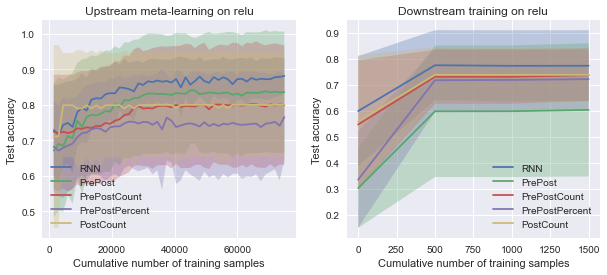

In [10]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_prepost_up, agg_stats_prepostcount_up, agg_stats_prepostpercent_up, agg_stats_postcount_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_prepost_down, agg_stats_prepostcount_down, agg_stats_prepostpercent_down, agg_stats_postcount_down]
labels = ['RNN', 'PrePost', 'PrePostCount', 'PrePostPercent', 'PostCount']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset,
                    'Downstream training on ' + dataset,
                    'figs/comparing_transfer_table_' + dataset)

In [11]:
if 0:
    agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
    agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
    for i in range(len(stats_prepost_up)):
        plot_curves(stats_prepost_up[i], stats_prepost_down[i],
                    '[PrePost] Upstream meta-learning on ' + dataset,
                    '[PrePost] Downstream training on ' + dataset)

## Similarly, evaluate RNN and table-based networks but retain the SAME instance upstream and downstream; only the dataset is reinstantiated.

In [3]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts = Options(gd_input=True,
               use_graph_rule=True,
               gd_graph_rule=True,
               use_output_rule=True,
               gd_output_rule=True,
               gd_output=False)
scheme = UpdateScheme(cross_entropy_loss=True,
                      mse_loss=False,
                      update_misclassified_only=False,
                      update_all_edges=True)

# Feed-forward brain config.
# See start of notebook.
n = 8

# Training config.
# See start of notebook.

In [6]:
# Instantiate brain factories.
brain_rnn_fact = lambda: LocalNet(n_up, m, 64, p, 32, 3, options=opts, update_scheme=scheme)
brain_prepost_fact = lambda: FFLocalNet(
    n, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts, update_scheme=scheme)
brain_prepostcount_fact = lambda: FFLocalNet(
    n, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts, update_scheme=scheme)
brain_prepostpercent_fact = lambda: FFLocalNet(
    n, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts, update_scheme=scheme)
brain_postcount_fact = lambda: FFLocalNet(
    n, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts, update_scheme=scheme)

In [7]:
# Evaluate models.
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_brain(
    brain_rnn_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_brain(
    brain_prepost_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Incoming Count ====')
stats_prepostcount_up, stats_prepostcount_down = evaluate_brain(
    brain_prepostcount_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Binned Incoming Fraction ====')
stats_prepostpercent_up, stats_prepostpercent_down = evaluate_brain(
    brain_prepostpercent_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Post and Incoming Count ====')
stats_postcount_up, stats_postcount_down = evaluate_brain(
    brain_postcount_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====

Run 1 / 10...
Count of 0: 2576  Count of 1: 3424
Meta-learning...


  2%|▏         | 28/1500 [00:00<00:05, 271.97it/s]

Last loss: 0.4755
Last train accuracy: 0.8407
Last test accuracy: 0.8167
Count of 0: 34  Count of 1: 5966
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4853
INITIAL test accuracy: 0.5009
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.3014
Last train accuracy: 0.0067
Last test accuracy: 0.0053


Run 2 / 10...
Count of 0: 1661  Count of 1: 4339
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4447
Last train accuracy: 0.9220
Last test accuracy: 0.9107
Count of 0: 3928  Count of 1: 2072
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6407
INITIAL test accuracy: 0.6593
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6341
Last train accuracy: 0.6407
Last test accuracy: 0.6593


Run 3 / 10...
Count of 0: 4728  Count of 1: 1272
Meta-learning...


100%|██████████| 50/50 [03:48<00:00,  4.57s/it]


Last loss: 0.4301
Last train accuracy: 0.7913
Last test accuracy: 0.7869
Count of 0: 622  Count of 1: 5378
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.8247


  2%|▏         | 26/1500 [00:00<00:06, 243.26it/s]

INITIAL test accuracy: 0.8102
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4104
Last train accuracy: 0.8620
Last test accuracy: 0.8518


Run 4 / 10...
Count of 0: 1886  Count of 1: 4114
Meta-learning...


100%|██████████| 50/50 [03:53<00:00,  4.68s/it]


Last loss: 0.4786
Last train accuracy: 0.8713
Last test accuracy: 0.8844
Count of 0: 2201  Count of 1: 3799
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6093


  1%|          | 15/1500 [00:00<00:10, 143.65it/s]

INITIAL test accuracy: 0.6209
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6876
Last train accuracy: 0.5933
Last test accuracy: 0.5987


Run 5 / 10...
Count of 0: 251  Count of 1: 5749
Meta-learning...


100%|██████████| 50/50 [03:46<00:00,  4.54s/it]


Last loss: 0.3514
Last train accuracy: 0.9573
Last test accuracy: 0.9609
Count of 0: 4222  Count of 1: 1778
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.3120


  1%|▏         | 19/1500 [00:00<00:07, 189.13it/s]

INITIAL test accuracy: 0.3004
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5988
Last train accuracy: 0.6940
Last test accuracy: 0.7069


Run 6 / 10...
Count of 0: 3652  Count of 1: 2348
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4166
Last train accuracy: 0.8940
Last test accuracy: 0.8953
Count of 0: 3191  Count of 1: 2809
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5627
INITIAL test accuracy: 0.5760
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7239
Last train accuracy: 0.6000
Last test accuracy: 0.5969


Run 7 / 10...
Count of 0: 4593  Count of 1: 1407
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4437
Last train accuracy: 0.7600
Last test accuracy: 0.7673
Count of 0: 3359  Count of 1: 2641
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4433
INITIAL test accuracy: 0.4758
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7016
Last train accuracy: 0.5867
Last test accuracy: 0.5509


Run 8 / 10...
Count of 0: 1619  Count of 1: 4381
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3897
Last train accuracy: 0.9500
Last test accuracy: 0.9409
Count of 0: 5399  Count of 1: 601
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5507
INITIAL test accuracy: 0.5502
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4273
Last train accuracy: 0.9007
Last test accuracy: 0.8996


Run 9 / 10...
Count of 0: 1533  Count of 1: 4467
Meta-learning...


100%|██████████| 50/50 [03:54<00:00,  4.68s/it]


Last loss: 0.4606
Last train accuracy: 0.8667
Last test accuracy: 0.8796
Count of 0: 5932  Count of 1: 68
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.9880


  1%|▏         | 20/1500 [00:00<00:07, 186.93it/s]

INITIAL test accuracy: 0.9889
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.3759
Last train accuracy: 0.9880
Last test accuracy: 0.9889


Run 10 / 10...
Count of 0: 1882  Count of 1: 4118
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4623
Last train accuracy: 0.8800
Last test accuracy: 0.8853
Count of 0: 3879  Count of 1: 2121
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.2640
INITIAL test accuracy: 0.2527
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6105
Last train accuracy: 0.6353
Last test accuracy: 0.6502

==== Interpretation: Pre and Post ====

Run 1 / 10...
Count of 0: 1652  Count of 1: 4348
Meta-learning...


100%|██████████| 50/50 [02:09<00:00,  2.58s/it]


Last loss: 0.4725
Last train accuracy: 0.7207
Last test accuracy: 0.7278
Count of 0: 2567  Count of 1: 3433
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5807


  1%|▏         | 21/1500 [00:00<00:07, 190.43it/s]

INITIAL test accuracy: 0.5722
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7487
Last train accuracy: 0.5807
Last test accuracy: 0.5722


Run 2 / 10...
Count of 0: 5861  Count of 1: 139
Meta-learning...


  3%|▎         | 47/1500 [00:00<00:03, 463.84it/s]

Last loss: 0.3355
Last train accuracy: 0.9800
Last test accuracy: 0.9758
Count of 0: 5892  Count of 1: 108
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.9813
INITIAL test accuracy: 0.9822
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.3273
Last train accuracy: 0.9813
Last test accuracy: 0.9822


Run 3 / 10...
Count of 0: 4688  Count of 1: 1312
Meta-learning...


  2%|▏         | 26/1500 [00:00<00:05, 258.42it/s]

Last loss: 0.4294
Last train accuracy: 0.7840
Last test accuracy: 0.7804
Count of 0: 3718  Count of 1: 2282
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6193
INITIAL test accuracy: 0.6198
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6900
Last train accuracy: 0.6193
Last test accuracy: 0.6198


Run 4 / 10...
Count of 0: 2140  Count of 1: 3860
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.5239
Last train accuracy: 0.6513
Last test accuracy: 0.6493
Count of 0: 4863  Count of 1: 1137
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.1933
INITIAL test accuracy: 0.1922
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5248
Last train accuracy: 0.8120
Last test accuracy: 0.8100


Run 5 / 10...
Count of 0: 4153  Count of 1: 1847
Meta-learning...


  2%|▏         | 25/1500 [00:00<00:06, 240.69it/s]

Last loss: 0.5114
Last train accuracy: 0.6993
Last test accuracy: 0.6898
Count of 0: 5222  Count of 1: 778
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.1447
INITIAL test accuracy: 0.1449
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4562
Last train accuracy: 0.8733
Last test accuracy: 0.8693


Run 6 / 10...
Count of 0: 2734  Count of 1: 3266
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.6931
Last train accuracy: 0.4680
Last test accuracy: 0.4516
Count of 0: 2048  Count of 1: 3952
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.3520
INITIAL test accuracy: 0.3378
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.3520
Last test accuracy: 0.3378


Run 7 / 10...
Count of 0: 1336  Count of 1: 4664
Meta-learning...


  3%|▎         | 39/1500 [00:00<00:03, 383.65it/s]

Last loss: 0.6931
Last train accuracy: 0.2220
Last test accuracy: 0.2229
Count of 0: 2712  Count of 1: 3288
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4627
INITIAL test accuracy: 0.4484
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4627
Last test accuracy: 0.4484


Run 8 / 10...
Count of 0: 931  Count of 1: 5069
Meta-learning...


  2%|▏         | 30/1500 [00:00<00:05, 269.06it/s]

Last loss: 0.4124
Last train accuracy: 0.8553
Last test accuracy: 0.8453
Count of 0: 2421  Count of 1: 3579
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.3913
INITIAL test accuracy: 0.4076
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7062
Last train accuracy: 0.6127
Last test accuracy: 0.5953


Run 9 / 10...
Count of 0: 2253  Count of 1: 3747
Meta-learning...


  3%|▎         | 46/1500 [00:00<00:03, 451.37it/s]

Last loss: 0.3974
Last train accuracy: 0.9253
Last test accuracy: 0.8964
Count of 0: 1642  Count of 1: 4358
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.2853
INITIAL test accuracy: 0.2698
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6014
Last train accuracy: 0.7013
Last test accuracy: 0.7053


Run 10 / 10...
Count of 0: 4069  Count of 1: 1931
Meta-learning...


  2%|▏         | 33/1500 [00:00<00:04, 327.37it/s]

Last loss: 0.5010
Last train accuracy: 0.6873
Last test accuracy: 0.6751
Count of 0: 4543  Count of 1: 1457
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.2473
INITIAL test accuracy: 0.2444
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5365
Last train accuracy: 0.7553
Last test accuracy: 0.7578

==== Interpretation: Pre and Post and Incoming Count ====

Run 1 / 10...
Count of 0: 4201  Count of 1: 1799
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.5007
Last train accuracy: 0.6820
Last test accuracy: 0.7062
Count of 0: 3506  Count of 1: 2494
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4313
INITIAL test accuracy: 0.4098
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7432
Last train accuracy: 0.5687
Last test accuracy: 0.5896


Run 2 / 10...
Count of 0: 3858  Count of 1: 2142
Meta-learning...


  1%|▏         | 21/1500 [00:00<00:07, 203.76it/s]

Last loss: 0.5054
Last train accuracy: 0.6427
Last test accuracy: 0.6431
Count of 0: 2860  Count of 1: 3140
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4573
INITIAL test accuracy: 0.4831
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7327
Last train accuracy: 0.5427
Last test accuracy: 0.5173


Run 3 / 10...
Count of 0: 3564  Count of 1: 2436
Meta-learning...


  3%|▎         | 38/1500 [00:00<00:03, 371.36it/s]

Last loss: 0.3960
Last train accuracy: 0.9233
Last test accuracy: 0.9231
Count of 0: 5878  Count of 1: 122
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.9807
INITIAL test accuracy: 0.9793
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4675
Last train accuracy: 0.8433
Last test accuracy: 0.8596


Run 4 / 10...
Count of 0: 3515  Count of 1: 2485
Meta-learning...


  2%|▏         | 25/1500 [00:00<00:05, 246.42it/s]

Last loss: 0.4089
Last train accuracy: 0.9260
Last test accuracy: 0.9027
Count of 0: 3023  Count of 1: 2977
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5040
INITIAL test accuracy: 0.5038
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5812
Last train accuracy: 0.7273
Last test accuracy: 0.7431


Run 5 / 10...
Count of 0: 4867  Count of 1: 1133
Meta-learning...


  2%|▏         | 32/1500 [00:00<00:04, 310.34it/s]

Last loss: 0.4165
Last train accuracy: 0.8287
Last test accuracy: 0.8053
Count of 0: 3180  Count of 1: 2820
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5200
INITIAL test accuracy: 0.5333
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7839
Last train accuracy: 0.5200
Last test accuracy: 0.5333


Run 6 / 10...
Count of 0: 4102  Count of 1: 1898
Meta-learning...


  1%|▏         | 22/1500 [00:00<00:06, 214.96it/s]

Last loss: 0.5115
Last train accuracy: 0.6847
Last test accuracy: 0.6833
Count of 0: 5677  Count of 1: 323
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.9500
INITIAL test accuracy: 0.9449
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.3664
Last train accuracy: 0.9500
Last test accuracy: 0.9449


Run 7 / 10...
Count of 0: 2399  Count of 1: 3601
Meta-learning...


  3%|▎         | 43/1500 [00:00<00:03, 427.47it/s]

Last loss: 0.3878
Last train accuracy: 0.9420
Last test accuracy: 0.9264
Count of 0: 4260  Count of 1: 1740
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.7020
INITIAL test accuracy: 0.7127
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6093
Last train accuracy: 0.7020
Last test accuracy: 0.7124


Run 8 / 10...
Count of 0: 4524  Count of 1: 1476
Meta-learning...


  2%|▏         | 35/1500 [00:00<00:04, 347.02it/s]

Last loss: 0.4758
Last train accuracy: 0.7320
Last test accuracy: 0.7613
Count of 0: 1022  Count of 1: 4978
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.8233
INITIAL test accuracy: 0.8178
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4850
Last train accuracy: 0.8233
Last test accuracy: 0.8178


Run 9 / 10...
Count of 0: 1136  Count of 1: 4864
Meta-learning...


  1%|          | 18/1500 [00:00<00:08, 176.43it/s]

Last loss: 0.4535
Last train accuracy: 0.8080
Last test accuracy: 0.8127
Count of 0: 3700  Count of 1: 2300
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.3973
INITIAL test accuracy: 0.3784
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7262
Last train accuracy: 0.6027
Last test accuracy: 0.6213


Run 10 / 10...
Count of 0: 5088  Count of 1: 912
Meta-learning...


  3%|▎         | 39/1500 [00:00<00:03, 388.11it/s]

Last loss: 0.4240
Last train accuracy: 0.8420
Last test accuracy: 0.8500
Count of 0: 2686  Count of 1: 3314
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5173
INITIAL test accuracy: 0.5436
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7837
Last train accuracy: 0.5173
Last test accuracy: 0.5436

==== Interpretation: Pre and Post and Binned Incoming Fraction ====

Run 1 / 10...
Count of 0: 3722  Count of 1: 2278
Meta-learning...


  2%|▏         | 23/1500 [00:00<00:06, 224.60it/s]

Last loss: 0.4080
Last train accuracy: 0.9153
Last test accuracy: 0.9127
Count of 0: 3343  Count of 1: 2657
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5447
INITIAL test accuracy: 0.5613
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5964
Last train accuracy: 0.7073
Last test accuracy: 0.6900


Run 2 / 10...
Count of 0: 5153  Count of 1: 847
Meta-learning...


  3%|▎         | 41/1500 [00:00<00:03, 405.51it/s]

Last loss: 0.4196
Last train accuracy: 0.8567
Last test accuracy: 0.8596
Count of 0: 2862  Count of 1: 3138
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5080
INITIAL test accuracy: 0.5207
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.8402
Last train accuracy: 0.5080
Last test accuracy: 0.5207


Run 3 / 10...
Count of 0: 907  Count of 1: 5093
Meta-learning...


  3%|▎         | 41/1500 [00:00<00:03, 401.82it/s]

Last loss: 0.4276
Last train accuracy: 0.8453
Last test accuracy: 0.8549
Count of 0: 1829  Count of 1: 4171
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.3100
INITIAL test accuracy: 0.3031
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6382
Last train accuracy: 0.6900
Last test accuracy: 0.6944


Run 4 / 10...
Count of 0: 3624  Count of 1: 2376
Meta-learning...


  3%|▎         | 41/1500 [00:00<00:03, 405.62it/s]

Last loss: 0.4428
Last train accuracy: 0.8773
Last test accuracy: 0.8684
Count of 0: 3268  Count of 1: 2732
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5500
INITIAL test accuracy: 0.5429
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5812
Last train accuracy: 0.7453
Last test accuracy: 0.7298


Run 5 / 10...
Count of 0: 3019  Count of 1: 2981
Meta-learning...


  3%|▎         | 41/1500 [00:00<00:03, 402.08it/s]

Last loss: 0.3904
Last train accuracy: 0.9360
Last test accuracy: 0.9182
Count of 0: 3280  Count of 1: 2720
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4253
INITIAL test accuracy: 0.4627
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5787
Last train accuracy: 0.7113
Last test accuracy: 0.7024


Run 6 / 10...
Count of 0: 4835  Count of 1: 1165
Meta-learning...


  3%|▎         | 41/1500 [00:00<00:03, 406.74it/s]

Last loss: 0.6931
Last train accuracy: 0.8040
Last test accuracy: 0.8064
Count of 0: 2593  Count of 1: 3407
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4387
INITIAL test accuracy: 0.4300
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4387
Last test accuracy: 0.4300


Run 7 / 10...
Count of 0: 3797  Count of 1: 2203
Meta-learning...


  3%|▎         | 41/1500 [00:00<00:03, 405.16it/s]

Last loss: 0.6931
Last train accuracy: 0.6460
Last test accuracy: 0.6284
Count of 0: 1310  Count of 1: 4690
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.2093
INITIAL test accuracy: 0.2213
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.2093
Last test accuracy: 0.2213


Run 8 / 10...
Count of 0: 3256  Count of 1: 2744
Meta-learning...


  2%|▏         | 29/1500 [00:00<00:05, 284.80it/s]

Last loss: 0.4412
Last train accuracy: 0.8800
Last test accuracy: 0.8722
Count of 0: 3260  Count of 1: 2740
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4700
INITIAL test accuracy: 0.4522
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6250
Last train accuracy: 0.6780
Last test accuracy: 0.6731


Run 9 / 10...
Count of 0: 2840  Count of 1: 3160
Meta-learning...


  1%|▏         | 21/1500 [00:00<00:07, 207.97it/s]

Last loss: 0.3876
Last train accuracy: 0.9387
Last test accuracy: 0.9269
Count of 0: 3943  Count of 1: 2057
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6513
INITIAL test accuracy: 0.6591
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6089
Last train accuracy: 0.6980
Last test accuracy: 0.7002


Run 10 / 10...
Count of 0: 4050  Count of 1: 1950
Meta-learning...


  3%|▎         | 41/1500 [00:00<00:03, 402.55it/s]

Last loss: 0.5176
Last train accuracy: 0.6600
Last test accuracy: 0.6800
Count of 0: 4867  Count of 1: 1133
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.2100
INITIAL test accuracy: 0.2024
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5133
Last train accuracy: 0.8087
Last test accuracy: 0.8120

==== Interpretation: Post and Incoming Count ====

Run 1 / 10...
Count of 0: 3439  Count of 1: 2561
Meta-learning...


  2%|▏         | 23/1500 [00:00<00:06, 218.34it/s]

Last loss: 0.5872
Last train accuracy: 0.5700
Last test accuracy: 0.5742
Count of 0: 3221  Count of 1: 2779
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5280
INITIAL test accuracy: 0.5398
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7676
Last train accuracy: 0.5280
Last test accuracy: 0.5398


Run 2 / 10...
Count of 0: 1588  Count of 1: 4412
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4775
Last train accuracy: 0.7327
Last test accuracy: 0.7456
Count of 0: 503  Count of 1: 5497
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0907
INITIAL test accuracy: 0.0816
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4092
Last train accuracy: 0.8947
Last test accuracy: 0.9082


Run 3 / 10...
Count of 0: 864  Count of 1: 5136
Meta-learning...


  3%|▎         | 45/1500 [00:00<00:03, 447.86it/s]

Last loss: 0.4039
Last train accuracy: 0.8653
Last test accuracy: 0.8651
Count of 0: 5829  Count of 1: 171
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0407
INITIAL test accuracy: 0.0338
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.3464
Last train accuracy: 0.9660
Last test accuracy: 0.9733


Run 4 / 10...
Count of 0: 1571  Count of 1: 4429
Meta-learning...


  2%|▏         | 25/1500 [00:00<00:06, 240.16it/s]

Last loss: 0.4788
Last train accuracy: 0.7320
Last test accuracy: 0.7402
Count of 0: 3097  Count of 1: 2903
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5333
INITIAL test accuracy: 0.5104
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7605
Last train accuracy: 0.5333
Last test accuracy: 0.5104


Run 5 / 10...
Count of 0: 4160  Count of 1: 1840
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4844
Last train accuracy: 0.6987
Last test accuracy: 0.6916
Count of 0: 2948  Count of 1: 3052
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5280
INITIAL test accuracy: 0.5182
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7572
Last train accuracy: 0.5280
Last test accuracy: 0.5182


Run 6 / 10...
Count of 0: 2342  Count of 1: 3658
Meta-learning...


  3%|▎         | 45/1500 [00:00<00:03, 443.63it/s]

Last loss: 0.6931
Last train accuracy: 0.3853
Last test accuracy: 0.3920
Count of 0: 424  Count of 1: 5576
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0727
INITIAL test accuracy: 0.0700
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.0727
Last test accuracy: 0.0700


Run 7 / 10...
Count of 0: 4988  Count of 1: 1012
Meta-learning...


  3%|▎         | 42/1500 [00:00<00:03, 418.09it/s]

Last loss: 0.4222
Last train accuracy: 0.8280
Last test accuracy: 0.8324
Count of 0: 2464  Count of 1: 3536
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5987
INITIAL test accuracy: 0.5864
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7165
Last train accuracy: 0.5987
Last test accuracy: 0.5864


Run 8 / 10...
Count of 0: 8  Count of 1: 5992
Meta-learning...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3174
Last train accuracy: 0.9993
Last test accuracy: 0.9984
Count of 0: 1986  Count of 1: 4014
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.3273
INITIAL test accuracy: 0.3322
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6373
Last train accuracy: 0.6727
Last test accuracy: 0.6678


Run 9 / 10...
Count of 0: 464  Count of 1: 5536
Meta-learning...


  1%|          | 18/1500 [00:00<00:08, 176.45it/s]

Last loss: 0.3782
Last train accuracy: 0.9207
Last test accuracy: 0.9253
Count of 0: 886  Count of 1: 5114
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.8460
INITIAL test accuracy: 0.8558
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4573
Last train accuracy: 0.8460
Last test accuracy: 0.8558


Run 10 / 10...
Count of 0: 99  Count of 1: 5901
Meta-learning...


  3%|▎         | 45/1500 [00:00<00:03, 448.18it/s]

Last loss: 0.6931
Last train accuracy: 0.0127
Last test accuracy: 0.0178
Count of 0: 3759  Count of 1: 2241
Training SAME brain instance (NO backprop)...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6053
INITIAL test accuracy: 0.6336
Epoch 1 / 1 ...


100%|██████████| 1500/1500 [00:03<00:00, 436.29it/s]


Last loss: 0.6931
Last train accuracy: 0.6053
Last test accuracy: 0.6336



Saving figure to: figs/comparing_single_rnn_relu


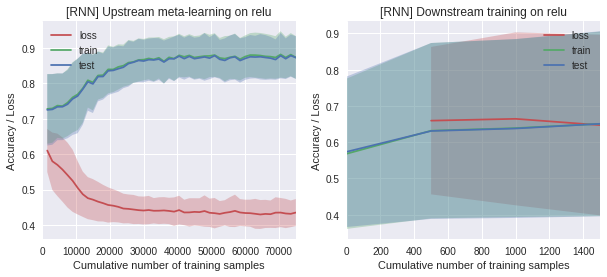

Mean essential stats across all runs:
Last upstream loss: 0.4353
Last upstream train accuracy: 0.8733
Last upstream test accuracy: 0.8728
Last downstream loss: 0.6471
Last downstream train accuracy: 0.6507
Last downstream test accuracy: 0.6508

Saving figure to: figs/comparing_single_prepost_relu


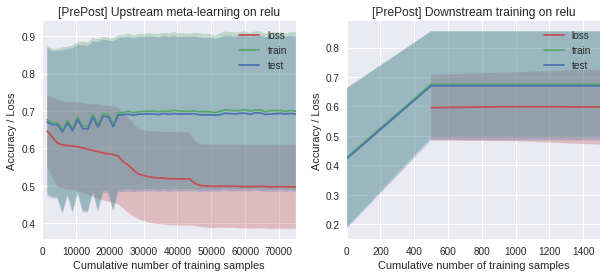

Mean essential stats across all runs:
Last upstream loss: 0.4970
Last upstream train accuracy: 0.6993
Last upstream test accuracy: 0.6914
Last downstream loss: 0.5977
Last downstream train accuracy: 0.6751
Last downstream test accuracy: 0.6698

Saving figure to: figs/comparing_single_prepostcount_relu


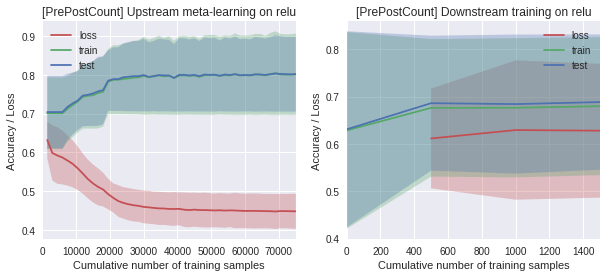

Mean essential stats across all runs:
Last upstream loss: 0.4480
Last upstream train accuracy: 0.8011
Last upstream test accuracy: 0.8014
Last downstream loss: 0.6279
Last downstream train accuracy: 0.6797
Last downstream test accuracy: 0.6883

Saving figure to: figs/comparing_single_prepostpercent_relu


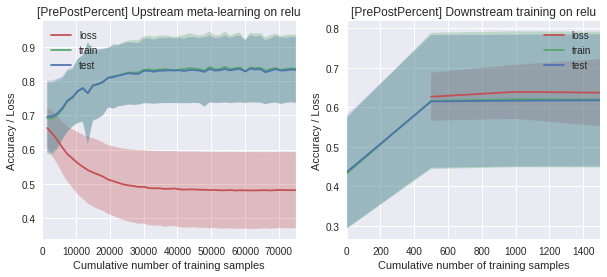

Mean essential stats across all runs:
Last upstream loss: 0.4821
Last upstream train accuracy: 0.8359
Last upstream test accuracy: 0.8328
Last downstream loss: 0.6368
Last downstream train accuracy: 0.6195
Last downstream test accuracy: 0.6174

Saving figure to: figs/comparing_single_postcount_relu


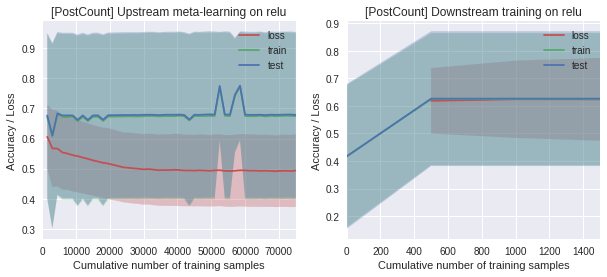

Mean essential stats across all runs:
Last upstream loss: 0.4936
Last upstream train accuracy: 0.6745
Last upstream test accuracy: 0.6783
Last downstream loss: 0.6238
Last downstream train accuracy: 0.6245
Last downstream test accuracy: 0.6264



In [8]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on ' + dataset,
            '[RNN] Downstream training on ' + dataset,
            'figs/comparing_single_rnn_' + dataset)
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on ' + dataset,
            '[PrePost] Downstream training on ' + dataset,
            'figs/comparing_single_prepost_' + dataset)
agg_stats_prepostcount_up = convert_multi_stats_uncertainty(stats_prepostcount_up)
agg_stats_prepostcount_down = convert_multi_stats_uncertainty(stats_prepostcount_down)
plot_curves(agg_stats_prepostcount_up, agg_stats_prepostcount_down,
            '[PrePostCount] Upstream meta-learning on ' + dataset,
            '[PrePostCount] Downstream training on ' + dataset,
            'figs/comparing_single_prepostcount_' + dataset)
agg_stats_prepostpercent_up = convert_multi_stats_uncertainty(stats_prepostpercent_up)
agg_stats_prepostpercent_down = convert_multi_stats_uncertainty(stats_prepostpercent_down)
plot_curves(agg_stats_prepostpercent_up, agg_stats_prepostpercent_down,
            '[PrePostPercent] Upstream meta-learning on ' + dataset,
            '[PrePostPercent] Downstream training on ' + dataset,
            'figs/comparing_single_prepostpercent_' + dataset)
agg_stats_postcount_up = convert_multi_stats_uncertainty(stats_postcount_up)
agg_stats_postcount_down = convert_multi_stats_uncertainty(stats_postcount_down)
plot_curves(agg_stats_postcount_up, agg_stats_postcount_down,
            '[PostCount] Upstream meta-learning on ' + dataset,
            '[PostCount] Downstream training on ' + dataset,
            'figs/comparing_single_postcount_' + dataset)

Saving figure to: figs/comparing_single_table_relu


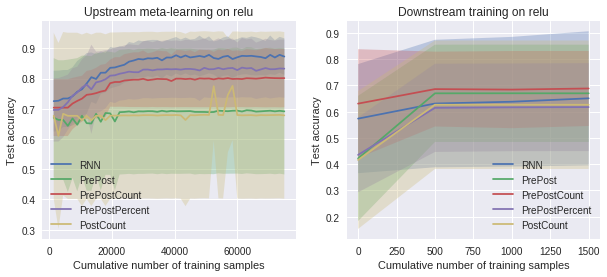

In [9]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_prepost_up, agg_stats_prepostcount_up, agg_stats_prepostpercent_up, agg_stats_postcount_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_prepost_down, agg_stats_prepostcount_down, agg_stats_prepostpercent_down, agg_stats_postcount_down]
labels = ['RNN', 'PrePost', 'PrePostCount', 'PrePostPercent', 'PostCount']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset,
                    'Downstream training on ' + dataset,
                    'figs/comparing_single_table_' + dataset)

## Evaluate all small-ANN-based feed-forward networks.